In [6]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sympy import symbols, lambdify, diff, Abs, Max, factorial

In [7]:
def interpolacao_newton(x_vals, y_vals):
    """
    Interpolação de Newton com diferenças divididas.
    Retorna o polinômio, tabela de diferenças e função lambda.
    """
    n = len(x_vals)
    dif_div = np.zeros((n, n))
    dif_div[:, 0] = y_vals

    for j in range(1, n):
        for i in range(j, n):
            dif_div[i, j] = (dif_div[i, j-1] - dif_div[i-1, j-1]) / (x_vals[i] - x_vals[i-j])

    x = symbols('x')
    P = dif_div[0, 0]
    termo = 1

    for k in range(1, n):
        termo *= (x - x_vals[k-1])
        P += dif_div[k, k] * termo

    P = sp.simplify(P)
    f_newton = lambdify(x, P, 'numpy')
    return P, dif_div, f_newton

In [8]:
def erro_interpolacao(f_expr, x_vals, x_avaliado):
    """
    Estimativa do erro de interpolação de Newton.
    """
    x = symbols('x')
    n = len(x_vals)
    derivada = f_expr
    for _ in range(n):
        derivada = diff(derivada, x)

    extremos = np.linspace(min(x_vals), max(x_vals), 100)
    f_derivada = lambdify(x, Abs(derivada), 'numpy')
    M = max(f_derivada(xi) for xi in extremos)

    produto = 1
    for xi in x_vals:
        produto *= (x_avaliado - xi)

    erro = M * abs(produto) / factorial(n)
    return erro

Interpolação de Newton por diferenças divididas

Polinômio interpolador de Newton:
                      2                              
- 0.0190476190476191⋅x  + 2.83809523809524⋅x + 1448.8

Tabela de diferenças divididas:
Ordem | Dif. 0 | Dif. 1 | Dif. 2
--------------------------------
x0   | 1552.0000 |    -    |    -   
x1   | 1548.0000 | -0.5714 |    -   
x2   | 1544.0000 | -0.8000 | -0.0190
Para x = 100.0000, y estimado = 1542.1333


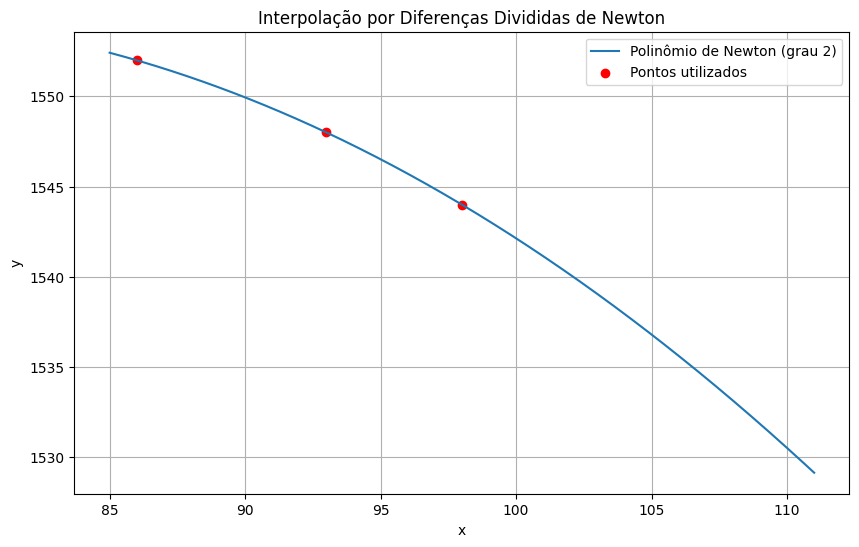

In [9]:
# Entrada de dados
print("Interpolação de Newton por diferenças divididas")
opcao = input("Deseja fornecer os y diretamente ou uma função f(x)? (y/f): ").lower()
x_vals = []
y_vals = []

n_total = int(input("Digite o número total de pontos disponíveis: "))

for i in range(n_total):
    x = float(input(f"x{i}: "))
    x_vals.append(x)

if opcao == 'y':
    for i in range(n_total):
        y = float(input(f"y{i}: "))
        y_vals.append(y)
    f_original = None
else:
    func_str = input("Digite a função f(x): ")
    x = symbols('x')
    f_expr = sp.sympify(func_str)
    f_original = f_expr
    f_func = lambdify(x, f_expr, 'numpy')
    y_vals = [f_func(xi) for xi in x_vals]

# Escolher grau do polinômio
max_grau = n_total - 1
grau = int(input(f"Digite o grau do polinômio (0 a {max_grau}): "))
if grau < 0 or grau > max_grau:
    raise ValueError("Grau inválido.")

# Seleciona apenas os pontos necessários
x_sel = x_vals[:grau + 1]
y_sel = y_vals[:grau + 1]

# Interpolação
P, tabela_dif_div, f_newton = interpolacao_newton(x_sel, y_sel)

print("\nPolinômio interpolador de Newton:")
print(sp.pretty(P, use_unicode=True))

# Tabela de diferenças divididas
print("\nTabela de diferenças divididas:")
header = "Ordem | " + " | ".join(f"Dif. {i}" for i in range(grau + 1))
print(header)
print("-" * len(header))
for i in range(grau + 1):
    linha = f"x{i}   | " + " | ".join(f"{tabela_dif_div[i, j]:.4f}" if j <= i else "   -   " for j in range(grau + 1))
    print(linha)

# Estimativa
while True:
    entrada = input("\nDigite um valor de x para estimar y (ou 'sair'): ")
    if entrada.lower() == 'sair':
        break
    try:
        x_input = float(entrada)
        y_estimado = f_newton(x_input)
        print(f"Para x = {x_input:.4f}, y estimado = {y_estimado:.4f}")
        if f_original is not None:
            erro = erro_interpolacao(f_original, x_sel, x_input)
            print(f"Limitante superior do erro ≈ {erro:.4f}")
    except ValueError:
        print("Entrada inválida. Digite um número ou 'sair'.")

# Gráfico
x_plot = np.linspace(min(x_vals) - 1, max(x_vals) + 1, 500)
y_plot = f_newton(x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label=f'Polinômio de Newton (grau {grau})')
plt.scatter(x_sel, y_sel, color='red', label='Pontos utilizados')
plt.title('Interpolação por Diferenças Divididas de Newton')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()